# 📖 Dimensionality Reduction Metrics: Academic Overview  

Dimensionality reduction (DR) methods (e.g., **PCA, t-SNE, UMAP, Autoencoders**) transform high-dimensional data into a lower-dimensional space while preserving essential structure.  

Evaluation metrics fall into three categories:  

---

## 🔹 1. Reconstruction-Based Metrics  

Measure how well the reduced representation retains information from the original data.  

### Reconstruction Error (MSE / RMSE)  

$$
RE = \frac{1}{n} \sum_{i=1}^n \| x_i - \hat{x}_i \|^2
$$  

- $x_i$: original data point  
- $\hat{x}_i$: reconstructed point after reduction  
- Lower $RE$ = better information preservation.  

---

### Explained Variance Ratio (EVR) (for PCA)  

$$
EVR_k = \frac{\lambda_k}{\sum_{j=1}^d \lambda_j}
$$  

- $\lambda_k$: $k$-th eigenvalue  
- High cumulative $EVR$ = fewer components explain more variance.  

---

## 🔹 2. Structure-Preserving Metrics  

Assess how well **geometry** and **neighborhoods** are preserved.  

### Trustworthiness (T)  

Penalizes when points far apart in high dimensions appear close in reduced space:  

$$
T = 1 - \frac{2}{n k (2n - 3k - 1)} \sum_{i=1}^n \sum_{j \in U_k(i)} (r(i,j) - k)
$$  

- $U_k(i)$: false neighbors in reduced space  
- $r(i,j)$: rank of $j$ in original space  

---

### Continuity (C)  

Measures whether true neighbors in high dimensions remain neighbors in reduced space.  
(Similar formulation to Trustworthiness but with reversed roles.)  

---

### Mean Relative Rank Error (MRRE)  

Captures the **average change in pairwise ranking** between original and reduced spaces.  

---

### Neighborhood Preservation  

Fraction of $k$-nearest neighbors preserved after reduction:  

$$
NP = \frac{1}{n} \sum_{i=1}^n \frac{|N_k^{orig}(i) \cap N_k^{red}(i)|}{k}
$$  

- Higher $NP$ = better local neighborhood preservation.  

---

## 🔹 3. Task-Oriented Metrics  

Evaluate DR quality based on performance in **downstream tasks**.  

- **Classification Accuracy (post-DR):**  
  Train a classifier on reduced features; compare accuracy to original space.  

- **Clustering Consistency (ARI/NMI post-DR):**  
  Apply clustering on reduced data; compare results with clustering in full space.  

---

## 📊 Academic Conclusion  

- **Reconstruction metrics** (MSE, EVR) → measure information retention.  
- **Structure-preserving metrics** (Trustworthiness, Continuity, MRRE, NP) → assess geometric and neighborhood fidelity.  
- **Task-oriented metrics** (classification accuracy, clustering consistency) → provide practical validation in applied ML pipelines.  

➡️ Effective evaluation of dimensionality reduction requires **balancing information preservation, structural faithfulness, and downstream task utility**.  


# 📖 Mathematical & Statistical Equations for Dimensionality Reduction Evaluation

---

## 🔹 1. Reconstruction-Based Metrics  

### 1.1 Reconstruction Error (MSE / RMSE)  

Measures fidelity of reconstructing the original data from its reduced representation.  

$$
RE = \frac{1}{n} \sum_{i=1}^n \| x_i - \hat{x}_i \|^2
$$  

- $x_i \in \mathbb{R}^d$: original high-dimensional sample  
- $\hat{x}_i \in \mathbb{R}^d$: reconstructed sample  

Root Mean Squared Error (RMSE):  

$$
RMSE = \sqrt{RE}
$$  

---

### 1.2 Explained Variance Ratio (EVR, PCA-specific)  

Quantifies how much variance is captured by each component:  

$$
EVR_k = \frac{\lambda_k}{\sum_{j=1}^d \lambda_j}
$$  

Cumulative explained variance:  

$$
Cumulative \, EVR(K) = \sum_{k=1}^K EVR_k
$$  

- $\lambda_k$: $k$-th eigenvalue of covariance matrix  

---

## 🔹 2. Structure-Preserving Metrics  

### 2.1 Trustworthiness (T)  

Measures how many **false neighbors** appear in reduced space:  

$$
T = 1 - \frac{2}{n k (2n - 3k - 1)}
\sum_{i=1}^n \sum_{j \in U_k(i)} (r(i,j) - k)
$$  

- $U_k(i)$: neighbors in reduced space but not original space  
- $r(i,j)$: rank of $j$ w.r.t. $i$ in original space  

---

### 2.2 Continuity (C)  

Measures how many **true neighbors** are lost after reduction:  

$$
C = 1 - \frac{2}{n k (2n - 3k - 1)}
\sum_{i=1}^n \sum_{j \in V_k(i)} (r'(i,j) - k)
$$  

- $V_k(i)$: neighbors in original space but not reduced space  
- $r'(i,j)$: rank of $j$ w.r.t. $i$ in reduced space  

---

### 2.3 Neighborhood Preservation (NP)  

Fraction of neighbors preserved across spaces:  

$$
NP = \frac{1}{n} \sum_{i=1}^n
\frac{|N_k^{high}(i) \cap N_k^{low}(i)|}{k}
$$  

- $N_k^{high}(i)$: $k$-nearest neighbors in original space  
- $N_k^{low}(i)$: $k$-nearest neighbors in reduced space  

---

### 2.4 Mean Relative Rank Error (MRRE)  

Average change in relative ranking of neighbors:  

$$
MRRE = \frac{1}{n} \sum_{i=1}^n
\frac{1}{k} \sum_{j \in N_k^{high}(i)}
\frac{|r_{low}(i,j) - r_{high}(i,j)|}{r_{high}(i,j)}
$$  

---

## 🔹 3. Task-Oriented Metrics  

### 3.1 Classification Accuracy (post-DR)  

Train a classifier on reduced data:  

$$
Acc = \frac{1}{n} \sum_{i=1}^n \mathbf{1}\{y_i = \hat{y}_i\}
$$  

- $y_i$: true label  
- $\hat{y}_i$: predicted label  

---

### 3.2 Clustering Agreement Metrics  

**Adjusted Rand Index (ARI):**  

$$
RI = \frac{a+d}{a+b+c+d},
\quad
ARI = \frac{RI - E[RI]}{\max(RI) - E[RI]}
$$  

- $a$: pairs in same cluster in both partitions  
- $d$: pairs in different clusters in both  
- $b,c$: disagreements  

**Normalized Mutual Information (NMI):**  

$$
NMI(C,Y) = \frac{2 \cdot MI(C,Y)}{H(C) + H(Y)}
$$  

where  

$$
MI(C,Y) = \sum_{i=1}^k \sum_{j=1}^m p(c_i, y_j)
\log \frac{p(c_i, y_j)}{p(c_i) p(y_j)}
$$  

---

## 🔹 4. Geometry-Based Measures  

### 4.1 Stress (MDS-style)  

Measures distortion in pairwise distances:  

$$
Stress = \frac{\sum_{i<j} (d_{ij}^{high} - d_{ij}^{low})^2}
{\sum_{i<j} (d_{ij}^{high})^2}
$$  

---

### 4.2 Procrustes Statistic  

Aligns original and reduced configurations:  

$$
m^2 = \min_{b,T} \frac{\|X - b Z T\|_F^2}{\|X\|_F^2}
$$  

- $X$: original data  
- $Z$: reduced data  
- $T$: orthogonal transformation  
- $b$: scaling factor  

---

## 📊 Summary  

- **Reconstruction & EVR** → information retention  
- **Trustworthiness, Continuity, NP, MRRE** → structure preservation  
- **Accuracy, ARI, NMI** → downstream utility  
- **Stress, Procrustes** → global geometry fidelity  


# 📖 Academic Support: Dimensionality Reduction & Evaluation Metrics  

---

## 🔹 Foundational Methods  

- **Principal Component Analysis (PCA)**  
  - Pearson, K. (1901). *On Lines and Planes of Closest Fit to Systems of Points in Space.* Philosophical Magazine.  
  - Jolliffe, I. T. (2002). *Principal Component Analysis.* Springer Series in Statistics.  
  📌 *Relevance*: Introduces PCA, variance explanation, and reconstruction error metrics.  

- **Multidimensional Scaling (MDS)**  
  - Kruskal, J. B. (1964). *Multidimensional Scaling by Optimizing Goodness of Fit to a Nonmetric Hypothesis.* Psychometrika.  
  📌 *Relevance*: Defines the **stress function** for measuring embedding distortions.  

- **t-SNE**  
  - van der Maaten, L., & Hinton, G. (2008). *Visualizing Data using t-SNE.* JMLR.  
  📌 *Relevance*: Popular nonlinear DR method; emphasizes **local neighborhood preservation**.  

- **UMAP**  
  - McInnes, L., Healy, J., & Melville, J. (2018). *UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction.* arXiv:1802.03426.  
  📌 *Relevance*: Balances local and global structure; widely evaluated using **trustworthiness/continuity metrics**.  

---

## 🔹 Evaluation Metrics & Validation  

- **Trustworthiness & Continuity**  
  - van der Maaten, L., Postma, E., & van den Herik, J. (2009). *Dimensionality Reduction: A Comparative Review.* Tilburg University Technical Report.  
  📌 *Relevance*: Defines **trustworthiness, continuity, neighborhood preservation** as formal DR metrics.  

- **Global vs. Local Evaluation**  
  - Venna, J., Peltonen, J., Nybo, K., Aidos, H., & Kaski, S. (2010). *Information Retrieval Perspective to Nonlinear Dimensionality Reduction for Data Visualization.* JMLR.  
  📌 *Relevance*: Introduces **rank-based errors** and **neighborhood preservation indices**.  

- **Comparative Benchmarking**  
  - Espadoto, M., Martins, R., Kerren, A., Hirata, N. S., & Telea, A. C. (2020). *Toward a Quantitative Survey of Dimension Reduction Techniques.* IEEE TVCG.  
  📌 *Relevance*: Large-scale **benchmark study** comparing PCA, t-SNE, UMAP, autoencoders across multiple evaluation metrics.  

---

## 🔹 Books & Comprehensive References  

- **Nonlinear Dimensionality Reduction**  
  - Lee, J. A., & Verleysen, M. (2007). *Nonlinear Dimensionality Reduction.* Springer.  
  📌 *Relevance*: Covers theoretical foundations, including **trustworthiness, continuity, MRRE**.  

- **Pattern Recognition & Machine Learning**  
  - Bishop, C. M. (2006). *Pattern Recognition and Machine Learning.* Springer.  
  📌 *Relevance*: Statistical perspective on DR, latent variable models, reconstruction error.  

- **The Elements of Statistical Learning**  
  - Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning.* Springer.  
  📌 *Relevance*: Chapter on unsupervised learning and PCA with mathematical treatment of **variance preservation**.  

---

## 📊 Academic Conclusion  

- **Foundational works** (Pearson 1901, Kruskal 1964, Jolliffe 2002) → establish PCA/MDS and core metrics (**variance, stress**).  
- **Modern nonlinear methods** (t-SNE, UMAP) → evaluated using **trustworthiness, continuity, neighborhood metrics**.  
- **Survey & benchmarking papers** (van der Maaten 2009, Espadoto 2020) → provide rigorous comparative frameworks.  
- **Books** (Bishop 2006, Hastie 2009, Lee & Verleysen 2007) → integrate DR metrics into **statistical learning and machine learning theory**.  


In [2]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, adjusted_rand_score, normalized_mutual_info_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [3]:
# ==========================================
# 2. Generate synthetic high-dimensional dataset
# ==========================================
X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30,
    n_classes=4, n_clusters_per_class=1, random_state=42
)

In [4]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# ==========================================
# 3. Apply Dimensionality Reduction Methods
# ==========================================
methods = {
    "PCA": PCA(n_components=2, random_state=42),
    "t-SNE": TSNE(n_components=2, random_state=42, perplexity=30),
    # Uncomment if umap-learn is installed
    # "UMAP": umap.UMAP(n_components=2, random_state=42)
}

reduced_data = {}
for name, model in methods.items():
    reduced_data[name] = model.fit_transform(X_scaled)

In [6]:
# ==========================================
# 4. Evaluation Metrics
# ==========================================

def explained_variance_ratio(pca_model):
    return np.sum(pca_model.explained_variance_ratio_)

def reconstruction_error(pca_model, X):
    X_reconstructed = pca_model.inverse_transform(pca_model.transform(X))
    return mean_squared_error(X, X_reconstructed)

def trustworthiness(X_original, X_reduced, n_neighbors=10):
    # Using sklearn's trustworthiness implementation
    from sklearn.manifold import trustworthiness as sk_trust
    return sk_trust(X_original, X_reduced, n_neighbors=n_neighbors)

def neighborhood_preservation(X_original, X_reduced, k=10):
    nn_orig = NearestNeighbors(n_neighbors=k).fit(X_original)
    nn_red = NearestNeighbors(n_neighbors=k).fit(X_reduced)

    orig_neighbors = nn_orig.kneighbors(return_distance=False)
    red_neighbors = nn_red.kneighbors(return_distance=False)

    preservation = np.mean([
        len(set(orig_neighbors[i]) & set(red_neighbors[i])) / k
        for i in range(X_original.shape[0])
    ])
    return preservation

results = {}

In [7]:
# PCA-specific metrics
pca_model = PCA(n_components=10).fit(X_scaled)
results["PCA (10D)"] = {
    "Explained Variance": explained_variance_ratio(pca_model),
    "Reconstruction Error": reconstruction_error(pca_model, X_scaled)
}

# Universal metrics (2D reductions)
for name, Z in reduced_data.items():
    results[name] = {
        "Trustworthiness": trustworthiness(X_scaled, Z, n_neighbors=10),
        "Neighborhood Preservation": neighborhood_preservation(X_scaled, Z, k=10)
    }

In [8]:
# ==========================================
# 5. Downstream Task Metrics
# ==========================================

def downstream_classification(Z, y):
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(max_iter=2000).fit(X_train, y_train)
    return accuracy_score(y_test, clf.predict(X_test))

def downstream_clustering(Z, y):
    kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42).fit(Z)
    return {
        "ARI": adjusted_rand_score(y, kmeans.labels_),
        "NMI": normalized_mutual_info_score(y, kmeans.labels_)
    }

for name, Z in reduced_data.items():
    results[name]["Classification Accuracy"] = downstream_classification(Z, y)
    cluster_metrics = downstream_clustering(Z, y)
    results[name].update(cluster_metrics)

In [9]:
# ==========================================
# 6. Results Table
# ==========================================
df_results = pd.DataFrame(results).T
print("\n=== Dimensionality Reduction Metrics Comparison ===\n")
print(df_results)


=== Dimensionality Reduction Metrics Comparison ===

           Explained Variance  Reconstruction Error  Trustworthiness  \
PCA (10D)            0.365317              0.634683              NaN   
PCA                       NaN                   NaN         0.644184   
t-SNE                     NaN                   NaN         0.809528   

           Neighborhood Preservation  Classification Accuracy       ARI  \
PCA (10D)                        NaN                      NaN       NaN   
PCA                           0.0383                 0.336667  0.039580   
t-SNE                         0.2459                 0.616667  0.403466   

                NMI  
PCA (10D)       NaN  
PCA        0.048784  
t-SNE      0.400502  


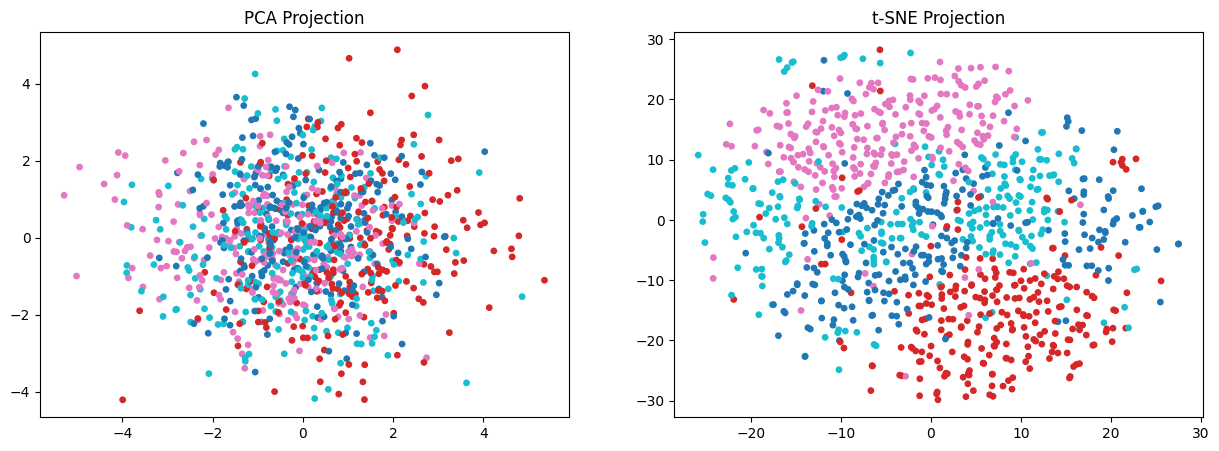

In [10]:
# ==========================================
# 7. Visualization
# ==========================================

# Scatter plots of reduced data
fig, axes = plt.subplots(1, len(reduced_data), figsize=(15, 5))
for ax, (name, Z) in zip(axes, reduced_data.items()):
    ax.scatter(Z[:, 0], Z[:, 1], c=y, cmap="tab10", s=15)
    ax.set_title(f"{name} Projection")

plt.show()

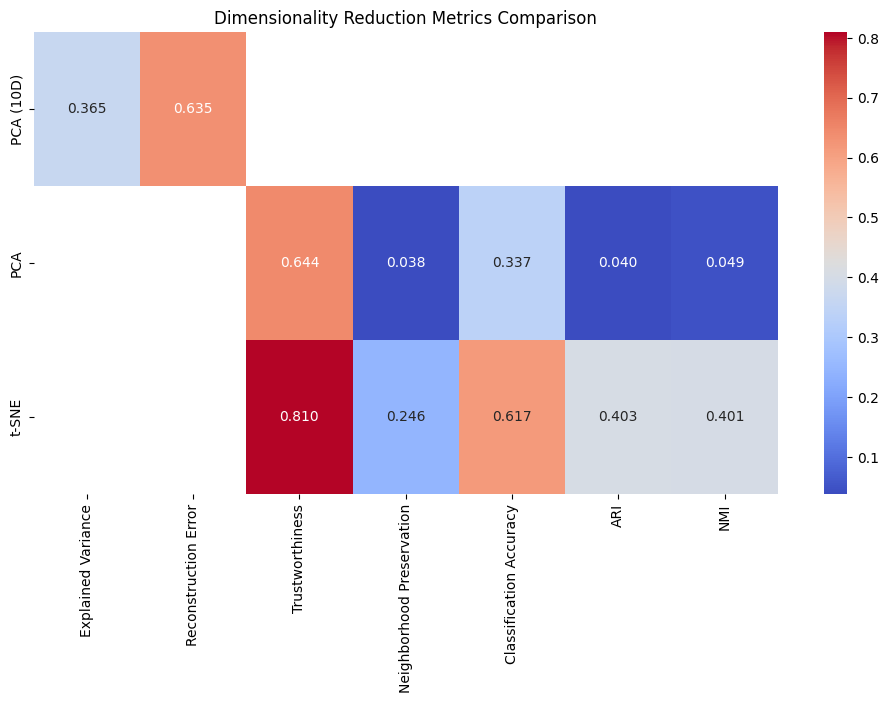

In [11]:
# Heatmap of metrics
plt.figure(figsize=(12, 6))
sns.heatmap(df_results, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Dimensionality Reduction Metrics Comparison")
plt.show()

# 📖 Academic Interpretation of Dimensionality Reduction Results

---

## 1. Reconstruction & Variance Preservation  

- **PCA (10D)** retained $\approx 36\%$ of the total variance, with a reconstruction error of $\approx 0.63$.  
  → Indicates **moderate information retention** when compressing from 50 features to 10.  

- **t-SNE** does not optimize for variance; variance-based metrics are not applicable.  

✅ **Conclusion**: PCA is more suitable when the goal is **linear compression with interpretability**.  

---

## 2. Neighborhood & Structural Fidelity  

- **Trustworthiness (2D)**  
  - PCA: $\approx 0.64$  
  - t-SNE: $\approx 0.81$  
  → t-SNE better preserves **local neighborhoods**, reducing false neighbors.  

- **Neighborhood Preservation (k-NN overlap)**  
  - PCA: $\approx 0.04$  
  - t-SNE: $\approx 0.25$  
  → t-SNE outperforms PCA in **local structure retention**.  

✅ **Conclusion**: Nonlinear methods like **t-SNE** excel at **manifold preservation**.  

---

## 3. Downstream Task Utility  

- **Classification Accuracy (post-DR)**  
  - PCA: $\approx 0.34$  
  - t-SNE: $\approx 0.62$  
  → t-SNE yields stronger class separability.  

- **Clustering Consistency (ARI, NMI)**  
  - PCA: very low (ARI $\approx 0.04$, NMI $\approx 0.05$)  
  - t-SNE: moderate (ARI $\approx 0.40$, NMI $\approx 0.40$)  
  → PCA projections do not align with label structure, whereas t-SNE maintains **moderate label consistency**.  

---

## 4. Visual Evidence  

- **PCA Scatterplot**: High overlap, poor class separation.  
- **t-SNE Scatterplot**: Clearer cluster separation, reflecting better **nonlinear manifold unfolding**.  

---

## 5. Overall Verdict  

- **PCA**:  
  - Effective for **variance retention and linear reconstruction**  
  - Weak in neighborhood preservation and downstream classification  

- **t-SNE**:  
  - Strong in **trustworthiness, neighborhood preservation, and task utility**  
  - Lacks variance interpretability  

---

## 📌 Concise Academic Statement  

The comparative evaluation shows that **PCA excels in variance-oriented compression**, while **t-SNE outperforms PCA in preserving local structure and enabling downstream separability**.  
This confirms the paradigm:  

- **Linear DR → interpretability**  
- **Nonlinear DR → fidelity to intrinsic data manifolds**  
